In [3]:
from brian2 import * 

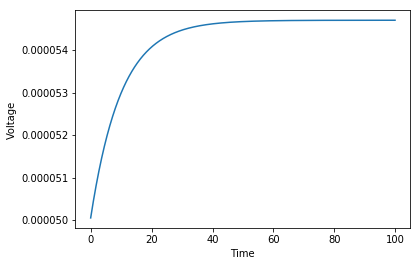

In [21]:
#Super simple IF
start_scope()

tau = 10*ms

eqs = '''
        dv/dt = (v0 - v) / tau : volt (unless refractory)
        v0 : volt
        '''
group = NeuronGroup(1, eqs, threshold='v > 10*mV', reset='v = 0*mV',
                    refractory=5*ms, method='exponential_euler')

group.v = rand()*mV
group.v0 = rand()*mV

M = StateMonitor(group, 'v', record=True)

run(100*ms)
plot(M.t/ms, M.v[0])
xlabel('Time')
ylabel('Voltage')
show()

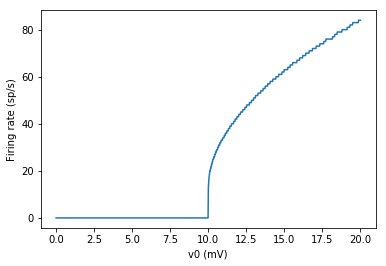

In [24]:
start_scope()
n = 1000
duration = 1*second
tau = 10*ms
eqs = '''
dv/dt = (v0 - v) / tau : volt (unless refractory)
v0 : volt
'''
group = NeuronGroup(n, eqs, threshold='v > 10*mV', reset='v = 0*mV',
                    refractory=5*ms, method='exponential_euler')
group.v = 0*mV
group.v0 = '20*mV * i / (n-1)'

monitor = SpikeMonitor(group)

run(duration)
plot(group.v0/mV, monitor.count / duration)
xlabel('v0 (mV)')
ylabel('Firing rate (sp/s)')
show()

In [25]:
#Standard IF + STDP (from the tutorial)

start_scope()

N = 500
taum = 10*ms
taupre = 20*ms
taupost = taupre
Ee = 0*mV
vt = -54*mV
vr = -60*mV
El = -74*mV
taue = 5*ms
F = 15*Hz
gmax = .01
dApre = .01
dApost = -dApre * taupre / taupost * 1.05
dApost *= gmax
dApre *= gmax
numIn = 50

eqs_neurons = '''
                dv/dt = (ge * (Ee-vr) + El - v) / taum : volt
                dge/dt = -ge / taue : 1
                '''

inputG = PoissonGroup(numIn, rates=randomInput(numIn, 20))
neurons = NeuronGroup(500, eqs_neurons, threshold='v>vt', reset='v = vr',
                      method='rk2')
S = Synapses(inputG, neurons,
             '''w : 1
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
             on_pre='''ge += w
                    Apre += dApre
                    w = clip(w + Apost, 0, gmax)''',
             on_post='''Apost += dApost
                     w = clip(w + Apre, 0, gmax)''',
             )

S.connect()
#S.w = 'rand() * gmax'
S.w= 0.005



net = Network(inputG, neurons)
net.store()
net.restore()
net.run(1*second)

smIn = SpikeMonitor(inputG)
smNeurons = SpikeMonitor(neurons)

NameError: name 'randomInput' is not defined